In [2]:
import pandas as pd

In [21]:
prvo=pd.read_csv("/home/ivan/Desktop/Diplomska/final_results_csv/cleaned_all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv")
prvo['ms'].sum()
prvo['perplexity'].mean()

np.float64(40.459680186598575)

In [4]:
prvo

,author,song_title,styles_to_apply,name_of_new_song,new_song,input_tokens,output_tokens,total_tokens,ms,perplexity
0,Петре М. Андреевски,ПЕТТО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Оти таа беше меѓу сите,Оти таа беше меѓу сите\n\nОти таа беше меѓу си...,1145,319,1464,3676,33.310551
1,Петре М. Андреевски,1903,Фигуративен јазик\nФрагмент од реченица\nДолга...,Ехо на споменот,"Ехо на споменот\n\nЖивотот како сенка избледе,...",1077,406,1483,5139,21.491814
2,Петре М. Андреевски,ПРВО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во сенка на неповрат,Во сенка на неповрат\n\nБеше тогаш кога сите д...,1152,333,1485,4445,46.736248
3,Петре М. Андреевски,ПЕСНА ЗА НЕЈЗИНАТА ПЕСНА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Месечината и Јас,"Месечината и Јас\n\nВо ноќта сјајна, месечина ...",924,416,1340,4910,25.855577
4,Петре М. Андреевски,УШТЕ ЕДНИ ПОДАТОЦИ ЗА ДЕНИЦИЈА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Дамарот на срцето,"Дамарот на срцето\n\nПред неа, животот нејзин\...",921,251,1172,3478,35.507175
...,...,...,...,...,...,...,...,...,...,...
1194,Ристо Лазаров,СЕКОГАШ,Фигуративен јазик\nФрагмент од реченица\nДолга...,Волшебство меѓу две,"Волшебство меѓу две\n\nСреде светот, две сме н...",1014,314,1328,3562,36.695976
1195,Ристо Лазаров,ГРОБИШТАТА РЕКОЛЕТА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во средината на ноќта,"Во средината на ноќта\n\nСреде оваа ноќ, кога ...",650,371,1021,4350,29.069963
1196,Ристо Лазаров,СРЕБРЕНАТА РЕКА,Фигуративен јазик\nФрагмент од реченица\nАктив...,Изгубена време,Изгубена време\n\nСреде забежани секундарни ти...,661,270,931,3434,43.924839
1197,Ристо Лазаров,КАТАДЕН,Фигуративен јазик\nФрагмент од реченица\nДолга...,Среде Сенките,"Среде Сенките\n\nСреде сенките што ме кријат,\...",699,355,1054,4309,50.797077


In [9]:
import os
import pandas as pd
import glob

# Пат до фолдерот
path = '/home/ivan/Desktop/Diplomska/final_results_csv'

# Најди сите CSV што почнуваат со 'all_songs'
csv_files = glob.glob(os.path.join(path, 'all_songs*.csv'))
csv_files.sort()  # Сортирај ги фајловите по име (за предвидлив редослед)

print(f"Пронајдени {len(csv_files)} CSV фајлови")

# Резултати по модел
results = {}

# Суми за сè
total_input_all = 0
total_output_all = 0
total_tokens_all = 0
total_ms_all = 0
total_perplexity_sum = 0
total_rows_all = 0

for file in csv_files:
    df = pd.read_csv(file)
    
    # Пресметки
    total_input = df['input_tokens'].sum()
    total_output = df['output_tokens'].sum()
    total_tokens = total_input + total_output
    total_ms = df['ms'].sum()
    avg_perplexity = df['perplexity'].mean()
    
    # Име на моделот од фајлот
    model_name = os.path.basename(file).replace('all_songs_', '').replace('.csv', '')
    
    results[model_name] = {
        'total_input': total_input,
        'total_output': total_output,
        'total_tokens': total_tokens,
        'total_ms': total_ms,
        'avg_perplexity': avg_perplexity
    }
    
    # Акчумулирај за вкупно
    total_input_all += total_input
    total_output_all += total_output
    total_tokens_all += total_tokens
    total_ms_all += total_ms
    total_perplexity_sum += (avg_perplexity * len(df))
    total_rows_all += len(df)

# --- ПЕЧАТЕЊЕ СО АЗБУЧНО СОРТИРАЊЕ ---
print("\nРЕЗУЛТАТИ ПО МОДЕЛ (сортирано азбучно):")
print("Модел" + " " * 50 + "Вкупно Input  Вкупно Output  Вкупно Tokens   Вкупно ms  Прос. Perplexity")
print("-" * 120)

# Сортирај ги моделите по име (азбучно)
for model in sorted(results.keys()):
    vals = results[model]
    print(f"{model:<60} {vals['total_input']:>12} {vals['total_output']:>13} {vals['total_tokens']:>13} {vals['total_ms']:>11} {vals['avg_perplexity']:>16.4f}")

# --- ВКУПНО ЗА СИТЕ ---
overall_avg_perplexity = total_perplexity_sum / total_rows_all if total_rows_all > 0 else 0

print("\n" + "="*120)
print(f"СУМИРАЊЕ ЗА СИТЕ ({len(csv_files)} модели):")
print(f"Вкупно Input:      {total_input_all:,}")
print(f"Вкупно Output:     {total_output_all:,}")
print(f"Вкупно Tokens:     {total_tokens_all:,}")
print(f"Вкупно ms:         {total_ms_all:,}")
print(f"Просечна Perplexity (пондерирана): {overall_avg_perplexity:,.4f}")
print("="*120)

Пронајдени 18 CSV фајлови

РЕЗУЛТАТИ ПО МОДЕЛ (сортирано азбучно):
Модел                                                  Вкупно Input  Вкупно Output  Вкупно Tokens   Вкупно ms  Прос. Perplexity
------------------------------------------------------------------------------------------------------------------------
1_claude_example_idf_styles_with_perplexity                        896151        373378       1269529     4871520          40.4597
1_nova_idf_styles_examples_with_perplexity                         907854        573153       1481007     3666062          91.9534
2_claude_idf_styles_with_perplexity                                538521        351440        889961     6157609          41.2942
2_nova_idf_styles_with_perplexity                                  528041        549029       1077070     3572594         102.5512
3_claude_idf_with_perplexity                                       272410        243824        516234     3066880          36.1664
3_nova_idf_with_perplexity   

In [6]:
cleaned=pd.read_csv('cleaned_songs_with_perplexity.csv')
print(cleaned['perplexity'].mean())


52.06126137541372


In [6]:
cleaned

,author,context,additional_context,song_title,song_text,source,perplexity
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga,31.430820
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga,35.652641
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga,64.885216
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga,50.804806
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga,46.842594
...,...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ,55.186443
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ,72.803398
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ,69.041504
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ,42.878834


All songs 

In [29]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_perplexity_kde_by_model():
    # --- ПАТ ДО ФОЛДЕР ---
    folder_path = "."  # <-- ТУКА СЕ ФАЈЛОВИТЕ

  

    all_csv = glob.glob(os.path.join(folder_path, "*.csv"))
    print(f"Вкупно CSV фајлови во '{folder_path}': {len(all_csv)}")
    if not all_csv:
        print("   Нема CSV фајлови во папката!")
        return

    print("\nПронајдени фајлови:")
    for f in all_csv:
        print(f"   • {os.path.basename(f)}")

    nova_files = [f for f in all_csv if "nova" in f.lower()]
    claude_files = [f for f in all_csv if "claude" in f.lower()]
    cleaned_file = next((f for f in all_csv if "cleaned_songs_with_perplexity.csv" in f.lower()), None)

    print(f"\nФилтрирани:")
    print(f"   Nova: {len(nova_files)} фајлови")
    print(f"   Claude: {len(claude_files)} фајлови")
    print(f"   Cleaned: {'Да' if cleaned_file else 'Нема'}")

    def read_perplexity(files):
        data = []
        for file in files:
            try:
                df = pd.read_csv(file)
                ppl_col = next((col for col in df.columns if 'perplexity' in col.lower()), None)
                if ppl_col:
                    values = df[ppl_col].dropna()
                    data.extend(values.tolist())
                    print(f"     {os.path.basename(file)} → {len(values)} песни")
                else:
                    print(f"     {os.path.basename(file)} → нема perplexity колона")
            except Exception as e:
                print(f"     Грешка при читање {file}: {e}")
        return data

    # --- Собери податоци ---
    nova_data = read_perplexity(nova_files)
    claude_data = read_perplexity(claude_files)
    cleaned_data = read_perplexity([cleaned_file]) if cleaned_file else []

    if not (nova_data or claude_data or cleaned_data):
        print("Нема податоци за perplexity!")
        return

    # --- Плотирај ---
    plt.figure(figsize=(12, 7))

    if nova_data:
        sns.kdeplot(data=nova_data, label="Nova", color='tab:red', linewidth=2.5)
    if claude_data:
        sns.kdeplot(data=claude_data, label="Claude", color='tab:blue', linewidth=2.5)
    if cleaned_data:
        sns.kdeplot(data=cleaned_data, label="Cleaned Songs", color='tab:green', linewidth=2.5, linestyle='--')

    plt.title("Perplexity Distribution (KDE)", fontsize=16, fontweight='bold')
    plt.xlabel("Perplexity")
    plt.ylabel("Density")
    plt.xlim(0, 130)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig("perplexity_kde.png", dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nЗачувано: perplexity_kde.png")
    print(f"   • Nova: {len(nova_data)} песни")
    print(f"   • Claude: {len(claude_data)} песни")
    print(f"   • Cleaned: {len(cleaned_data)} песни")

Вкупно CSV фајлови во '.': 24

Пронајдени фајлови:
   • all_songs_3_nova_idf_with_perplexity.csv
   • semantic_search_log.csv
   • api_styles_all_in_one_text.csv
   • all_songs_5_claude_raw_author_with_perplexity.csv
   • cleaned_songs_with_perplexity.csv
   • all_songs_9_nova_idf_styles_explanatory_dictionary_makedonizer_with_perplexity.csv
   • all_songs_8_claude_idf_styles_rag_example_makedonizer_with_perplexity.csv
   • all_songs_8_nova_idf_styles_rag_example_makedonizer_with_perplexity.csv
   • all_songs_2_claude_idf_styles_with_perplexity.csv
   • all_songs_4_nova_styles_with_perplexity.csv
   • all_songs_1_nova_idf_styles_examples_with_perplexity.csv
   • all_songs_1_claude_example_idf_styles_with_perplexity.csv
   • all_songs_4_claude_styles_with_perplexity.csv
   • all_songs_3_claude_idf_with_perplexity.csv
   • all_songs_6_nova_explanatory_dictionary_with_perplexity.csv
   • all_songs_7_claude_idf_styles_rag_example_with_perplexity.csv
   • all_songs_6_claude_explanatory_dict

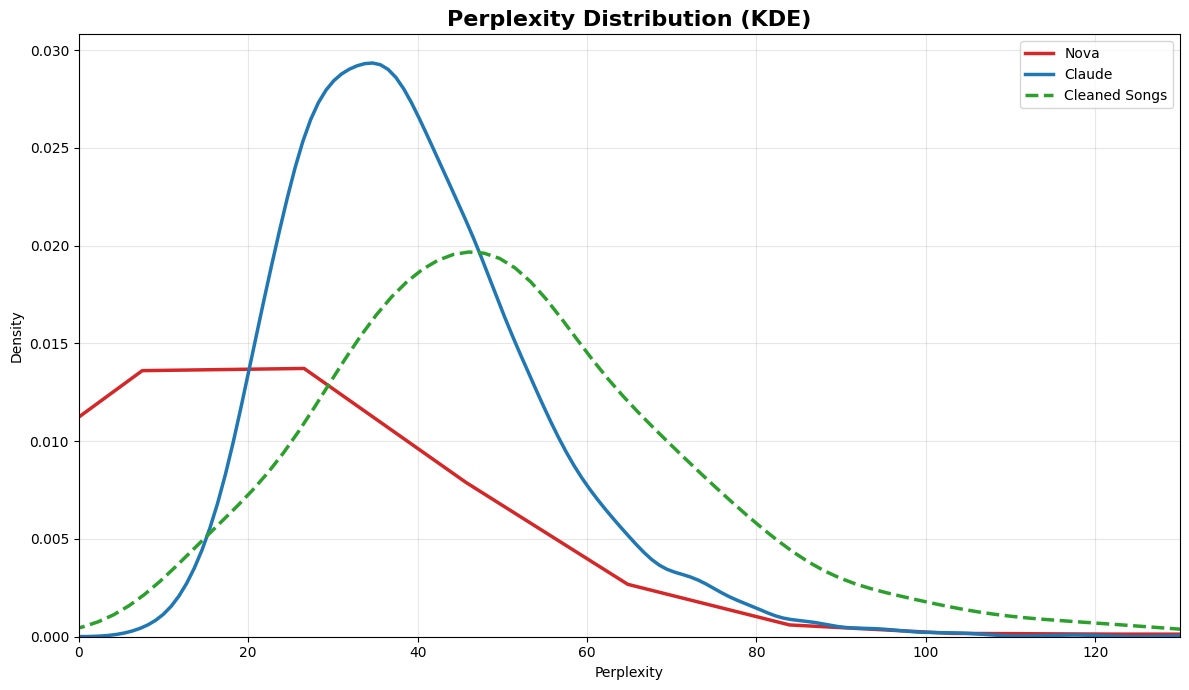


Зачувано: perplexity_kde.png
   • Nova: 10583 песни
   • Claude: 10801 песни
   • Cleaned: 1199 песни


In [30]:
plot_perplexity_kde_by_model()

In [33]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def plot_perplexity_kde_by_model():
    folder_path = "."  # Тековна папка
    all_csv = glob.glob(os.path.join(folder_path, "*.csv"))
    
    if not all_csv:
        print("Нема CSV фајлови!")
        return

    # --- Филтрирај ---
    nova_files = {f for f in all_csv if "nova" in f.lower()}
    claude_files = {f for f in all_csv if "claude" in f.lower()}
    cleaned_file = next((f for f in all_csv if "cleaned_songs_with_perplexity" in f.lower()), None)

    # --- Парсирај број од име ---
    def get_number(fname):
        match = re.search(r'all_songs_(\d+)', fname)
        return int(match.group(1)) if match else None

    # --- Групирај по број ---
    pairs = {}
    for f in nova_files | claude_files:
        num = get_number(f)
        if num:
            pairs.setdefault(num, {'nova': None, 'claude': None})
            if 'nova' in f.lower():
                pairs[num]['nova'] = f
            elif 'claude' in f.lower():
                pairs[num]['claude'] = f

    # --- Читај cleaned ---
    cleaned_data = []
    if cleaned_file:
        try:
            df = pd.read_csv(cleaned_file)
            ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
            if ppl_col:
                cleaned_data = df[ppl_col].dropna().tolist()
                print(f"Cleaned: {len(cleaned_data)} песни")
        except Exception as e:
            print(f"Грешка при cleaned: {e}")

    # --- Плотирај секој пар ---
    print(f"\nПлотирање на {len(pairs)} парови...")
    for num in sorted(pairs.keys()):
        pair = pairs[num]
        nova_file = pair['nova']
        claude_file = pair['claude']

        nova_data = claude_data = None

        # Читај Nova
        if nova_file:
            try:
                df = pd.read_csv(nova_file)
                ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
                if ppl_col:
                    nova_data = df[ppl_col].dropna().tolist()
                    print(f"  {num}: Nova → {len(nova_data)} песни")
            except Exception as e:
                print(f"  Грешка Nova {num}: {e}")

        # Читај Claude
        if claude_file:
            try:
                df = pd.read_csv(claude_file)
                ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
                if ppl_col:
                    claude_data = df[ppl_col].dropna().tolist()
                    print(f"  {num}: Claude → {len(claude_data)} песни")
            except Exception as e:
                print(f"  Грешка Claude {num}: {e}")

        # Пресметај ако има податоци
        if not nova_data and not claude_data:
            continue

        # --- Плотирај ---
        plt.figure(figsize=(11, 6))
        if nova_data:
            sns.kdeplot(data=nova_data, label=f"Nova #{num}", color='tab:red', linewidth=2.5)
        if claude_data:
            sns.kdeplot(data=claude_data, label=f"Claude #{num}", color='tab:blue', linewidth=2.5)
        if cleaned_data:
            sns.kdeplot(data=cleaned_data, label="Cleaned Songs", color='tab:green', linestyle='--', linewidth=2)

        plt.title(f"Perplexity KDE — Pair #{num}", fontsize=15, fontweight='bold')
        plt.xlabel("Perplexity")
        plt.ylabel("Density")
        plt.xlim(0, 130)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.tight_layout()
        
        plt.savefig(f"perplexity_kde_pair_{num}.png", dpi=300, bbox_inches='tight')
        plt.close()

        print(f"  Зачувано: perplexity_kde_pair_{num}.png")

    print(f"\nГотово! {len(pairs)} графикони зачувани.")
plot_perplexity_kde_by_model()

Cleaned: 1199 песни

Плотирање на 9 парови...
  1: Nova → 1199 песни
  1: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_1.png
  2: Nova → 1199 песни
  2: Claude → 1212 песни
  Зачувано: perplexity_kde_pair_2.png
  3: Nova → 1199 песни
  3: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_3.png
  4: Nova → 1199 песни
  4: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_4.png
  5: Nova → 1199 песни
  5: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_5.png
  6: Nova → 1168 песни
  6: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_6.png
  7: Nova → 1122 песни
  7: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_7.png
  8: Nova → 1132 песни
  8: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_8.png
  9: Nova → 1166 песни
  9: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_9.png

Готово! 9 графикони зачувани.


In [7]:
verify=pd.read_csv('/home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge.csv')
verify


,author,song_title,styles_to_apply,name_of_new_song,new_song,input_tokens,output_tokens,total_tokens,ms,perplexity,bleu_score,rouge_1,rouge_2,rouge_l
0,Петре М. Андреевски,ПЕТТО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Оти таа беше меѓу сите,Оти таа беше меѓу сите\n\nОти таа беше меѓу си...,1145,319,1464,3676,33.310551,0.001164,0.0,0.0,0.0
1,Петре М. Андреевски,1903,Фигуративен јазик\nФрагмент од реченица\nДолга...,Ехо на споменот,"Ехо на споменот\n\nЖивотот како сенка избледе,...",1077,406,1483,5139,21.491814,0.002117,0.0,0.0,0.0
2,Петре М. Андреевски,ПРВО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во сенка на неповрат,Во сенка на неповрат\n\nБеше тогаш кога сите д...,1152,333,1485,4445,46.736248,0.002479,0.0,0.0,0.0
3,Петре М. Андреевски,ПЕСНА ЗА НЕЈЗИНАТА ПЕСНА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Месечината и Јас,"Месечината и Јас\n\nВо ноќта сјајна, месечина ...",924,416,1340,4910,25.855577,0.003404,0.0,0.0,0.0
4,Петре М. Андреевски,УШТЕ ЕДНИ ПОДАТОЦИ ЗА ДЕНИЦИЈА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Дамарот на срцето,"Дамарот на срцето\n\nПред неа, животот нејзин\...",921,251,1172,3478,35.507175,0.000395,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Ристо Лазаров,СЕКОГАШ,Фигуративен јазик\nФрагмент од реченица\nДолга...,Волшебство меѓу две,"Волшебство меѓу две\n\nСреде светот, две сме н...",1014,314,1328,3562,36.695976,0.002822,0.0,0.0,0.0
1195,Ристо Лазаров,ГРОБИШТАТА РЕКОЛЕТА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во средината на ноќта,"Во средината на ноќта\n\nСреде оваа ноќ, кога ...",650,371,1021,4350,29.069963,0.002857,0.0,0.0,0.0
1196,Ристо Лазаров,СРЕБРЕНАТА РЕКА,Фигуративен јазик\nФрагмент од реченица\nАктив...,Изгубена време,Изгубена време\n\nСреде забежани секундарни ти...,661,270,931,3434,43.924839,0.003098,0.0,0.0,0.0
1197,Ристо Лазаров,КАТАДЕН,Фигуративен јазик\nФрагмент од реченица\nДолга...,Среде Сенките,"Среде Сенките\n\nСреде сенките што ме кријат,\...",699,355,1054,4309,50.797077,0.002329,0.0,0.0,0.0


In [2]:
import torch
import pandas as pd
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def create_csv_with_custom_bertscore(input_csv, reference_path='/home/ivan/Desktop/Diplomska/final_results_csv/cleaned_songs_with_perplexity.csv',
                                     reference_col='song_text', generated_col='new_song', batch_size=8):
    if not torch.cuda.is_available():
        raise RuntimeError("CUDA device not available. This function requires a GPU.")
    
    device = torch.device("cuda")
    model_name = "macedonizer/mk-roberta-base"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()

    df_generated = pd.read_csv(input_csv)
    df_reference = pd.read_csv(reference_path)

    df_generated['bertscore_f1'] = None

    references = df_reference[reference_col].fillna("").astype(str).tolist()
    candidates = df_generated[generated_col].fillna("").astype(str).tolist()

    embeddings_ref = []
    embeddings_cand = []

    for i in range(0, len(df_reference), batch_size):
        batch_refs = references[i:i+batch_size]
        enc_ref = tokenizer(batch_refs, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        enc_ref = {k: v.to(device) for k, v in enc_ref.items()}
        with torch.no_grad():
            outputs_ref = model(**enc_ref)
            hidden_ref = outputs_ref.last_hidden_state
            mask_ref = enc_ref['attention_mask'].unsqueeze(-1)
            pooled_ref = (hidden_ref * mask_ref).sum(dim=1) / mask_ref.sum(dim=1).clamp(min=1)
            embeddings_ref.append(pooled_ref.cpu().numpy())

    embeddings_ref = np.vstack(embeddings_ref)

    for i in range(0, len(df_generated), batch_size):
        batch_cands = candidates[i:i+batch_size]
        enc_cand = tokenizer(batch_cands, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        enc_cand = {k: v.to(device) for k, v in enc_cand.items()}
        with torch.no_grad():
            outputs_cand = model(**enc_cand)
            hidden_cand = outputs_cand.last_hidden_state
            mask_cand = enc_cand['attention_mask'].unsqueeze(-1)
            pooled_cand = (hidden_cand * mask_cand).sum(dim=1) / mask_cand.sum(dim=1).clamp(min=1)
            embeddings_cand.append(pooled_cand.cpu().numpy())

    embeddings_cand = np.vstack(embeddings_cand)

    n = min(len(df_generated), len(df_reference))
    for i in tqdm(range(n), desc="Calculating BERTScore"):
        score = cosine_similarity(embeddings_ref[i].reshape(1, -1), embeddings_cand[i].reshape(1, -1))[0, 0]
        df_generated.at[i, 'bertscore_f1'] = float(score)

    output_csv = f"{input_csv.rsplit('.', 1)[0]}_with_custom_bertscore.csv"
    df_generated.to_csv(output_csv, index=False)
    print(f"✅ Saved custom BERTScore results to {output_csv}")

    return output_csv


In [3]:
import os



def batch_run_bertscore(results_dir="/home/ivan/Desktop/Diplomska/final_results_csv"):
    for file_name in os.listdir(results_dir):
        if file_name.endswith("_with_rouge.csv"):
            input_path = os.path.join(results_dir, file_name)
            print(f"\n🚀 Processing file: {input_path}")
            try:
                create_csv_with_custom_bertscore(input_path)
            except Exception as e:
                print(f"❌ Error processing {file_name}: {e}")

    print("\n✅ Finished running BERTScore on all matching CSV files.")

# Run it
if __name__ == "__main__":
    batch_run_bertscore()



🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_5_nova_raw_author_with_perplexity_with_bleu_with_rouge.csv


2025-11-13 11:03:28.423518: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-13 11:03:28.453375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Deskto

✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_5_nova_raw_author_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_3_claude_idf_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6969.67it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_3_claude_idf_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 7087.45it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_8_nova_idf_styles_rag_example_makedonizer_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1132/1132 [00:00<00:00, 6900.26it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_8_nova_idf_styles_rag_example_makedonizer_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_6_nova_explanatory_dictionary_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1168/1168 [00:00<00:00, 7029.81it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_6_nova_explanatory_dictionary_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_4_nova_styles_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6849.72it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_4_nova_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_8_claude_idf_styles_rag_example_makedonizer_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6701.30it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_8_claude_idf_styles_rag_example_makedonizer_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_9_claude_idf_styles_explanatory_dictionary_makedonizer_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6264.97it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_9_claude_idf_styles_explanatory_dictionary_makedonizer_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_3_nova_idf_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6618.11it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_3_nova_idf_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_5_claude_raw_author_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6512.66it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_5_claude_raw_author_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6542.52it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6483.72it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_2_nova_idf_styles_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1199/1199 [00:00<00:00, 6143.33it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_2_nova_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_7_nova_idf_styles_rag_example_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1122/1122 [00:00<00:00, 6236.11it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_7_nova_idf_styles_rag_example_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_6_claude_explanatory_dictionary_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1198/1198 [00:00<00:00, 6239.05it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_6_claude_explanatory_dictionary_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_9_nova_idf_styles_explanatory_dictionary_makedonizer_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1166/1166 [00:00<00:00, 6528.26it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_9_nova_idf_styles_explanatory_dictionary_makedonizer_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_4_claude_styles_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1198/1198 [00:00<00:00, 5904.78it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_4_claude_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

🚀 Processing file: /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_7_claude_idf_styles_rag_example_with_perplexity_with_bleu_with_rouge.csv


Some weights of RobertaModel were not initialized from the model checkpoint at macedonizer/mk-roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating BERTScore: 100%|██████████| 1198/1198 [00:00<00:00, 6146.28it/s]


✅ Saved custom BERTScore results to /home/ivan/Desktop/Diplomska/final_results_csv/all_songs_7_claude_idf_styles_rag_example_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv

✅ Finished running BERTScore on all matching CSV files.


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column_kde(column_name, results_dir="/home/ivan/Desktop/Diplomska/final_results_csv"):

    all_files = sorted([
        f for f in os.listdir(results_dir) 
        if f.startswith("cleaned_all_songs") and f.endswith(".csv")
    ])
    res=[]
    if not all_files:
        print("No files starting with 'all_songs' found.")
        return
    
    for file_name in all_files:
        csv_path = os.path.join(results_dir, file_name)
        print(f"\nProcessing: {file_name}")
        

        df = pd.read_csv(csv_path)
        

        scores = pd.to_numeric(df[column_name], errors='coerce').dropna()
        
        if len(scores) == 0:
            print(f"  No valid data in '{column_name}'")
            continue
        res.append(f'file {file_name } score {df['bertscore_f1'].mean()}')

        """plt.figure(figsize=(8, 5))
        sns.kdeplot(scores, fill=True, linewidth=2, bw_adjust=0.8)
        plt.title(f"KDE of {column_name}\n{file_name}", fontsize=14)
        plt.xlabel(column_name)
        plt.ylabel("Density")
        plt.tight_layout()
        plt.show()"""
        

        print(f"  Mean {column_name}: {scores.mean():.4f}")
    for r in res:
        print(r)
    print("\nFinished plotting all 'all_songs' KDEs.")


plot_column_kde("bertscore_f1")



Processing: cleaned_all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.7324

Processing: cleaned_all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.7044

Processing: cleaned_all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.7277

Processing: cleaned_all_songs_2_nova_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.6902

Processing: cleaned_all_songs_3_claude_idf_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.7009

Processing: cleaned_all_songs_3_nova_idf_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.6721

Processing: cleaned_all_songs_4_claude_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
  Mean bertscore_f1: 0.7291

Processing: 

In [18]:
rouge_l=pd.read_csv('/home/ivan/Desktop/Diplomska/final_results_csv/all_songs_9_claude_idf_styles_explanatory_dictionary_makedonizer_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv')

In [19]:
rouge_l

,author,song_title,styles_to_apply,name_of_new_song,new_song,input_tokens,output_tokens,total_tokens,ms,perplexity,bleu_score,rouge_1,rouge_2,rouge_l,bertscore_f1
0,Петре М. Андреевски,ПЕТТО ПИСМО,NaN,Меѓу расцепи и традиција,"Меѓу расцепи и традиција\n\nВо нејзината душа,...",6884,357,7241,9057,37.142864,0.001045,0.0,0.0,0.0,0.780244
1,Петре М. Андреевски,1903,NaN,Пред расцепи,Пред расцепи\n\nПред стари расцепи во традициј...,6884,236,7120,5129,28.477728,0.001061,0.0,0.0,0.0,0.769802
2,Петре М. Андреевски,ПРВО ПИСМО,NaN,Меѓу расцепи и традиции,Меѓу расцепи и традиции\n\nВо расцепи на време...,6884,204,7088,4987,44.897446,0.001114,0.0,0.0,0.0,0.808683
3,Петре М. Андреевски,ПЕСНА ЗА НЕЈЗИНАТА ПЕСНА,NaN,Раскол и Традиција,"Раскол и Традиција\n\nСо расцепот меѓу нас,\nП...",6884,269,7153,6552,26.441507,0.001655,0.0,0.0,0.0,0.736756
4,Петре М. Андреевски,УШТЕ ЕДНИ ПОДАТОЦИ ЗА ДЕНИЦИЈА,NaN,Расцепи на нејзината традиција,Расцепи на нејзината традиција\n\nМеѓу нејзини...,6884,200,7084,5995,18.843664,0.000060,0.0,0.0,0.0,0.679681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Ристо Лазаров,СЕКОГАШ,NaN,Средба на две времиња,Средба на две времиња\n\nОдново се средија два...,7046,194,7240,4515,37.739391,0.003798,0.0,0.0,0.0,0.647019
1195,Ристо Лазаров,ГРОБИШТАТА РЕКОЛЕТА,NaN,Средено изново,"Средено изново\n\nПод два одново се средат,\nс...",7046,173,7219,3311,55.516205,0.001849,0.0,0.0,0.0,0.678383
1196,Ристо Лазаров,СРЕБРЕНАТА РЕКА,NaN,Средено време,"Средено време\n\nЕм редам, ем средам\nПод двет...",7046,217,7263,3719,73.563622,0.002876,0.0,0.0,0.0,0.769344
1197,Ристо Лазаров,КАТАДЕН,NaN,Негова Одново,"Негова Одново\n\nСредувај ги твоите дни,\nДве ...",7046,208,7254,3652,25.511810,0.004209,0.0,0.0,0.0,0.733450


In [ ]:
import pandas as pd
cleaned=pd.read_csv("/home/ivan/Desktop/Diplomska/final_results_csv/cleaned_songs_with_perplexity.csv")
cleaned

In [7]:
import pandas as pd

# Load the data
prvo = pd.read_csv("/home/ivan/Desktop/Diplomska/final_results_csv/all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv")


bad_patterns = [
    "no_song_found",
    "тука вметни ја песната",   # exact phrase
    "вметни ја песната",        # common part
]

# Create a single boolean mask: True = bad row (to be removed)
bad_mask = prvo['new_song'].astype(str).str.contains('|'.join(bad_patterns), case=False, na=False)

# Keep only good rows
prvo_clean = prvo[~bad_mask]

# Compute mean perplexity
mean_ppl = prvo_clean['perplexity'].mean()

# Print results
print(f"Rows total:              {len(prvo)}")
print(f"Rows removed (bad text): {bad_mask.sum()}")
print(f"Rows kept (valid songs): {len(prvo_clean)}")
print(f"Mean perplexity (valid songs only): {mean_ppl:.2f}")

Rows total:              1199
Rows removed (bad text): 250
Rows kept (valid songs): 949
Mean perplexity (valid songs only): 17.47


In [8]:
import pandas as pd
import os

# === CONFIGURATION ===
folder = "/home/ivan/Desktop/Diplomska/final_results_csv"

# Bad patterns to remove
bad_patterns = [
    "no_song_found",
    "тука вметни ја песната",
    "вметни ја песната",
    "вметни песна",
    "тука вметни"
]
regex_bad = '|'.join(bad_patterns)

# Reference file to skip (you probably don't want to clean it)
skip_file = "cleaned_songs_with_perplexity.csv"

# === Find all relevant files ===
files = [
    f for f in os.listdir(folder)
    if "custom_bertscore" in f and f.endswith(".csv") and f != skip_file
]
files = sorted(files)  # alphabetical order

print(f"Found {len(files)} files with 'custom_bertscore' (excluding {skip_file})\n")
print("="*100)

results = []

for filename in files:
    filepath = os.path.join(folder, filename)
    
    # Load
    df = pd.read_csv(filepath)
    original_count = len(df)
    
    # Filter bad rows
    bad_mask = df['new_song'].astype(str).str.contains(regex_bad, case=False, na=False)
    df_clean = df[~bad_mask]
    kept_count = len(df_clean)
    removed_count = original_count - kept_count
    
    # Mean perplexity
    mean_ppl = df_clean['perplexity'].mean()
    
    # Save cleaned version
    new_name = "cleaned_" + filename
    new_path = os.path.join(folder, new_name)
    df_clean.to_csv(new_path, index=False)
    
    # Store result for summary
    results.append({
        "File": filename,
        "Original rows": original_count,
        "Removed rows": removed_count,
        "Kept rows": kept_count,
        "Mean PPL": mean_ppl
    })
    
    print(f"{filename}")
    print(f"   → Removed: {removed_count} rows | Kept: {kept_count} | Mean PPL: {mean_ppl:.2f}")
    print(f"   → Saved as: {new_name}")
    print("-" * 80)

# === Final summary table ===
print("\nSUMMARY")
summary_df = pd.DataFrame(results)
print(summary_df[["File", "Kept rows", "Mean PPL"]].to_string(index=False))

# Optional: save summary
summary_df.to_csv(os.path.join(folder, "cleaning_summary_custom_bertscore.csv"), index=False)
print(f"\nSummary saved to: cleaning_summary_custom_bertscore.csv")

Found 18 files with 'custom_bertscore' (excluding cleaned_songs_with_perplexity.csv)

all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
   → Removed: 0 rows | Kept: 1199 | Mean PPL: 40.46
   → Saved as: cleaned_all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
--------------------------------------------------------------------------------
all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
   → Removed: 272 rows | Kept: 927 | Mean PPL: 17.40
   → Saved as: cleaned_all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
--------------------------------------------------------------------------------
all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv
   → Removed: 1 rows | Kept: 1211 | Mean PPL: 41.23
   → Saved as: cleaned_all_songs_2_claude_idf_styles_w

In [16]:
test=pd.read_csv('/home/ivan/Desktop/Diplomska/final_results_csv/cleaned_all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv')
test

,author,song_title,styles_to_apply,name_of_new_song,new_song,input_tokens,output_tokens,total_tokens,ms,perplexity,bleu_score,rouge_1,rouge_2,rouge_l,bertscore_f1
0,Петре М. Андреевски,ПЕТТО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Сенки во тишина,"Сенки во тишина\n\nБеше првата, нејзината меѓу...",439,301,740,5824,26.782887,0.002786,0.0,0.0,0.0,0.801993
1,Петре М. Андреевски,ПЕТТО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Заборавениот спомен,"Заборавениот спомен\n\nБеше таа, меѓу сите,\nН...",439,349,788,6378,31.980316,0.000914,0.0,0.0,0.0,0.818575
2,Петре М. Андреевски,1903,Фигуративен јазик\nФрагмент од реченица\nДолга...,Сеќавања на минатото,Сеќавања на минатото\n\nВо сенките на вечноста...,608,447,1055,8948,23.200783,0.004105,0.0,0.0,0.0,0.849808
3,Петре М. Андреевски,ПРВО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Сенка на минатото,"Сенка на минатото\n\nБеше таа, меѓу сите,\nНеј...",442,303,745,5509,30.941273,0.001783,0.0,0.0,0.0,0.683005
4,Петре М. Андреевски,ПЕСНА ЗА НЕЈЗИНАТА ПЕСНА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Сенки на минатото,"Сенки на минатото\n\nВо сенките на минатото, т...",488,276,764,4900,25.399580,0.001818,0.0,0.0,0.0,0.663160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Ристо Лазаров,СЕКОГАШ,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во тајните на моментот,"Во тајните на моментот\n\nСреде тишинта жива, ...",595,306,901,4989,48.108021,0.002742,0.0,0.0,0.0,NaN
1207,Ристо Лазаров,ГРОБИШТАТА РЕКОЛЕТА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Песна на времето,"Песна на времето\n\nСреде вечноста, две души с...",414,395,809,4723,40.203831,0.002700,0.0,0.0,0.0,NaN
1208,Ристо Лазаров,СРЕБРЕНАТА РЕКА,Фигуративен јазик\nФрагмент од реченица\nАктив...,Сенки од вечноста,"Сенки од вечноста\n\nСреде два мига, одново су...",403,315,718,4602,53.841019,0.003539,0.0,0.0,0.0,NaN
1209,Ристо Лазаров,КАТАДЕН,Фигуративен јазик\nФрагмент од реченица\nДолга...,Сенки во времето,"Сенки во времето\n\nСреде двете, одново се јав...",434,240,674,3143,50.445396,0.003687,0.0,0.0,0.0,NaN


In [17]:

import os
import pandas as pd 
folder="/home/ivan/Desktop/Diplomska/final_results_csv"
files=[]
for f in os.listdir(folder):
    if 'custom_bertscore' in f and f.endswith('.csv'):
        files.append(f)
        
files = sorted(files)
total=0
claude=0

for f in files:
    print('========='*3)
    n=max(0,1199-len(pd.read_csv(f)))
    print(f'{f} len {len(pd.read_csv(f))}')
    if 'claude' in f:
        print(f'n {n}')
        claude+=n 
        print(f'claude {claude}')
    total+=n
    print(f'{f} - missing {n}')
print(f'total:{total}')
print(claude)

cleaned_all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv len 1199
n 0
claude 0
cleaned_all_songs_1_claude_example_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv - missing 0
cleaned_all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv len 927
cleaned_all_songs_1_nova_idf_styles_examples_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv - missing 272
cleaned_all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv len 1211
n 0
claude 0
cleaned_all_songs_2_claude_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv - missing 0
cleaned_all_songs_2_nova_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv len 983
cleaned_all_songs_2_nova_idf_styles_with_perplexity_with_bleu_with_rouge_with_custom_bertscore.csv - missing 216
cleaned_all_songs_3_claude_idf_with_perplexity_with_bl